In [39]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import gensim
import gensim.corpora as corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt



In [40]:
data = pd.read_csv('news_articles.csv')

In [41]:
data.head()

,id,title,content
0,25626,"One Weight-Loss Approach Fits All? No, Not Eve...","Dr. Frank Sacks, a professor of nutrition at H..."
1,19551,South Carolina Stuns Baylor to Reach the Round...,South Carolina’s win over Duke was not only ...
2,25221,"U.S. Presidential Race, Apple, Gene Wilder: Yo...",(Want to get this briefing by email? Here’s th...
3,18026,"His Predecessor Gone, Gambia’s New President F...","BANJUL, Gambia — A week after he was inaugu..."
4,21063,‘Harry Potter and the Cursed Child’ Goes From ...,The biggest book of the summer isn’t a blockbu...


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       100 non-null    int64 
 1   title    100 non-null    object
 2   content  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [43]:
articles = data['content']

articles = articles.str.lower().apply(lambda x: re.sub(r"([^\w\s])", "", x))

en_stopwords = stopwords.words('english')
articles = articles.apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))

articles = articles.apply(lambda x: word_tokenize(x))

ps = PorterStemmer()

articles = articles.apply(lambda tokens: [ps.stem(token) for token in tokens])

print(articles)

0     [dr, frank, sack, professor, nutrit, harvard, ...
1     [south, carolina, win, duke, surpris, fan, pos...
2     [want, get, brief, email, here, good, even, he...
3     [banjul, gambia, week, inaugur, anoth, countri...
4     [biggest, book, summer, isnt, blockbust, thril...
                            ...                        
95    [want, get, brief, email, here, good, even, he...
96    [tallinn, estonia, guard, brought, ahm, abdul,...
97    [gov, scott, walker, wisconsin, activ, wiscons...
98    [social, media, shook, emot, headlin, shout, n...
99    [moment, joanna, acevedo, first, set, foot, bo...
Name: content, Length: 100, dtype: object


In [44]:
dictionary = corpora.Dictionary(articles)
print(dictionary)

Dictionary<8693 unique tokens: ['10', '100', '108', '15', '155']...>


In [45]:
doc_term = [dictionary.doc2bow(text) for text in articles]

In [46]:
num_topics = 2

In [47]:
lda_model = gensim.models.LdaModel(
    corpus=doc_term,
    id2word=dictionary,
    num_topics=num_topics
)

In [48]:
lda_model.print_topics(num_topics=num_topics, num_words=5)

[(0,
  '0.019*"mr" + 0.014*"said" + 0.005*"trump" + 0.005*"would" + 0.004*"year"'),
 (1,
  '0.016*"said" + 0.015*"mr" + 0.006*"trump" + 0.004*"one" + 0.004*"state"')]

In [49]:
lsamodel = LsiModel(doc_term, num_topics=num_topics, id2word=dictionary)

In [50]:
print(lsamodel.print_topics(num_topics, num_words=5))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight"')]


In [51]:
coherence_values = []
model_list = []

min_topics = 2
max_topics = 11


for num_topics in range(min_topics, max_topics+1):
    model = LsiModel(doc_term, num_topics=num_topics, id2word=dictionary, random_seed=0)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=articles, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())
    


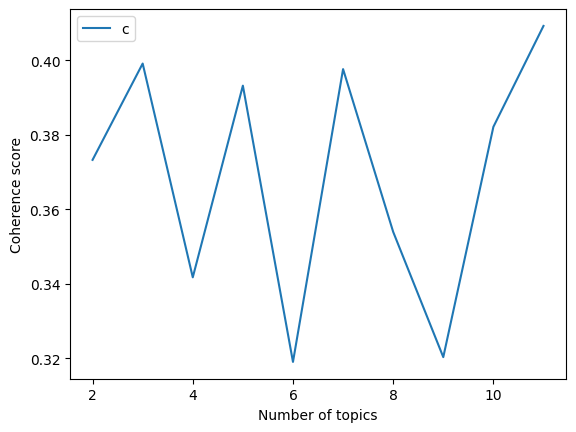

In [52]:
plt.plot(range(min_topics, max_topics+1), coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc="best")
plt.show()

In [53]:
optimal_topic_num = 3
lsamodel = LsiModel(doc_term, num_topics=optimal_topic_num, id2word=dictionary)
lsamodel.print_topics(optimal_topic_num, num_words=5)

[(0,
  '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'),
 (1,
  '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight"'),
 (2,
  '-0.460*"saudi" + -0.264*"taliban" + 0.249*"weight" + -0.194*"afghanistan" + 0.191*"dr"')]